# Lab 1: Neural networks that don't learn


**Cognitive Science 319, Fall 2023**

In this lab we'll be exploring the foundational computational steps for neural networks, minus the whole *learning* part. It turns out that there are lots of interesting modeling questions that can be explored via network architectures with manually set weights that don't change. Starting with these networks will be a gentler introduction to neural network models than starting with trainable models.

**Part 1** of this lab gets us comfortable working with python and Colab notebooks by building up a basic neural network from a single neuron to a multi-layer net.

**Part 2** of this lab explores the Interactive Activation model of Rumelhart & McClelland. This is a classic in cognitive science that has applications in memory and perception.

# Part 1: Introduction to Colab and Foundational Computations of Neural Nets


## What is Google Colab?

This document is a Google Colab notebook. The organizing principle of a notebook is the cell. Each cell in a notebook can be either a **text** cell (like this one) or a **code** cell. Code cells contain python code that can be run.

To add a new cell, you can hover your mouse below an existing cell. Try it below. Add a new text cell and write a favorite joke in it.

I'm sure whatever you wrote above is *hillarious*.

You can add basic formatting in a text cell, including images, using [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb). The toolbar that appears in a code cell gives you helpful reminders about how to use Markdown.

Now let's look at code. To run code on Colab, we need to connect to a runtime. Colab notebooks run on the Google Cloud, which means that it doesn't really matter what kind of machine you are using to write this notebook. The speed of the computation depends entirely on what kind of machine you connect to as the runtime. One of the nice features of Colab is that you can connect to a machine with a GPU, so you'll be able to train neural network models faster in later labs. For this lab, we aren't doing anything that uses a GPU, so we can use the default runtime of a CPU-only environment.

To connect to a runtime, click the connect button in the top right corner.

Alternatively, if you try to run a code cell and you are not connected to a runtime, you'll automatically be connected to one.

The cell below is a code cell. You can run it in a few different ways:

1. Click on the cell, and then click the play icon on the left-side of the cell.
2. Select **Runtime > Run Selection** from the menu.
3. Press Ctrl+Enter or Cmd+Enter.

Run the cell below. You should see the output appear right below the cell.

In [2]:
print("I ran.")

I ran.


Try adding a code cell below this one, and run some kind of simple mathematical operation, like adding 2 + 2 in the cell.

Two more things to know about Colab notebooks:

1. They function like most things in Google Drive. Changes are automatically saved and the files are stored in your Google Drive account.
2. Code doesn't run unless you make it run. For example, suppose you create some code at the top of your notebook that other code in the notebook needs later on. Then when you are working on later parts of the notebook you discover an error in the earlier section. If you edit the earlier section, but don't run the cell again, then nothing will be changed.

Alright, we are ready to do some neural network modeling!

## Foundational Neural Network Computations

You may have never programmed in Python before. We're going to learn Python this semester by focusing on the specific kinds of problems that we need to solve for neural network modeling. I'll do my best to gradually introduce these concepts as much as possible.

### Importing packages and functions

There are many python packages that provide useful functions for the kind of work that we'll be doing in this class. Normally, using a python package would first require installing the package and then loading it. However, Google Colab's cloud environment already has many commonly used packages installed, so we can skip the first step and just load the package.

The first package we are going to load is `numpy`. This is a very commonly used library for working with arrays of numbers. To load numpy we can run

```python
import numpy
```

This would allow us to use functions from `numpy` like this:

```python
numpy.zeros(10) # create an array of 10 zeros.
```
Imports can also be renamed when you import them. The conventional import for `numpy` is to use the shorthand `np`, like this:

```python
import numpy as np
```

Which then allows us to write slightly shorter code:

```python
np.zeros(10) # create an array of 10 zeros.
```

Edit the cell below to import `numpy` using the name `np`.

In [3]:
# import numpy below!
import numpy as np

### Computations for a single neuron

Here's our basic model of a neuron for neural networks:

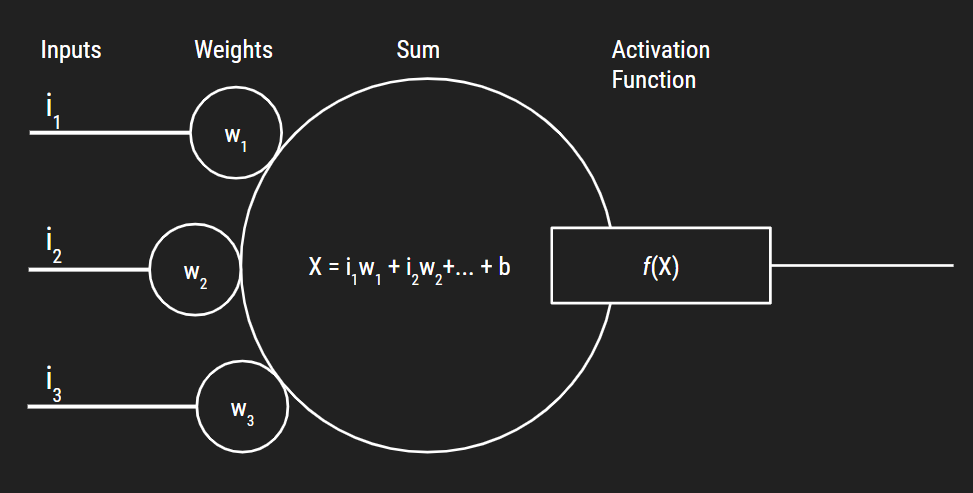


#### Inputs & Weights

Each neuron takes a set of inputs, *i<sub>1...n</sub>*, and a set of weights, *w<sub>1...n</sub>*.

Let's go ahead and use `numpy` to create these two vectors. For this demo, let's assume that the neuron has three inputs (and therefore three weights). We can manually create the inputs like this:

In [4]:
inputs = np.array([1,0.5,-1])

Notice that no printed output is generated by the above cell. If you want to verify that it worked correctly, you can add a `print()` call.

In [5]:
print(inputs)

[ 1.   0.5 -1. ]


Or, for slightly different output, you can just put the variable name and run the cell.

In [6]:
inputs

array([ 1. ,  0.5, -1. ])

Now, create the weights for the neuron. Set the weights to `0.5, 2, 1`.

In [7]:
weights = np.array([0.5, 2, 1])

The first step in calculating the output of the neuron is to calculate the input signal. The two vectors (`inputs` and `weights`) are multiplied element-wise (first element of each is multiplied, second element is multiplied, etc.) and these are all added together.

One way that you could do this would be to use array indexes, like this:

In [8]:
input_signal = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2]
print(input_signal)

0.5


But, this kind of multiply-then-add operation is a common one. It's called the *dot product*. `numpy` has a built in function to calculate the dot product, `np.dot()`.

In [9]:
input_signal = np.dot(inputs, weights)
print(input_signal)

0.5


They match! Hooray.

#### Bias parameter

Finally, most neuron models for a neural network include some kind of *bias* parameter. This is simply a number that gets added to the `input_signal`. It is used to adjust the default activation for a neuron, making certain neurons more likely to be active than others.

In [10]:
bias = 0.5

In [11]:
input_signal = np.dot(inputs, weights) + bias
input_signal

1.0

#### Activation function

The final piece of our model neuron is the activation function. Before we get to the specifics, we need to cover how to write a function in python.

To write a function in python we use the `def` keyword.

```python
def myFunction():
  print("called myFunction")
```

You can try it below:

In [12]:
def myFunction():
  print("called myFunction")

In [13]:
myFunction()

called myFunction


If the function has inputs, we list those in the parentheses after the function name.

```python
def showMessage(message):
  print(message)
```

If we want the function to output something (besides printing messages) we can use the `return` keyword. For example, here's a function that adds two numbers:

```python
def addTwoNumbers(a, b):
  return a + b
```

We could use it like this:

```python
sum = addTwoNumbers(4,5) # the variable sum will be 9.
```

The actvation function takes the sum that we previously calculated (`input_signal`) and transforms it in some arbitrary way. In order for neural networks to have their full computational capabilities, this function must be *nonlinear*, i.e., mapping the input to the output shouldn't produce a straight line on a graph if one axis is the input signal and the other axis is the output.

There are lots of activation functions that have been used in neural network modeling, and we'll explore these more over the course of the semester. One of the earliest, and still widely used in some circumstances, is the sigmoid activation function.

The equation for this function is

$f(x) = \frac{1}{1 + e^{-x}}$

Let's implement this in python.

Create a new function below called `sigmoid` that takes a single value `x` as a parameter. It should output `f(x)` as defined above. To implement $e^{-x}$, you can use a numpy function, `np.exp()`.

In [14]:
# implement the sigmoid function here
def sigmoid(x):
  return 1/(1 + np.exp(-x))

Let's test your function! If you wrote it correctly, the block below should output "Correct"

In [15]:
sigmoid(2)

0.8807970779778823

In [16]:
from math import isclose
x = np.array([-1,0,0.5,1,2]) # define a set of values to run through the function
y = sigmoid(x) # get the corresponding outputs from the function

# check if the outputs match hardcoded values. since these are floating point
# numbers that round, we use the isclose() function and specify the relative
# tolerance for what counts as close.
if (
    isclose(y[0], 0.268941421, rel_tol=1e-05) &
    isclose(y[1], 0.5, rel_tol=1e-05) &
    isclose(y[2], 0.622459331, rel_tol=1e-05) &
    isclose(y[3], 0.731058578, rel_tol=1e-05) &
    isclose(y[4], 0.880797077, rel_tol=1e-05)
):
  print("Correct")
else:
  print("Uh oh.")

Correct


##### Visualization

Now, let's graph the function so we can see what the sigmoid function is actually doing. To do this, we're going to need two new tools: data frames from the `pandas` library to hold our tabular (spreadsheet-like) data, and ggplot from the `plotnine` library.

We'll start by creating a data frame to hold two rows of data, inputs and the corresponding outputs for the `sigmoid` function.

To generate our `x_values`, we can use `np.arange()`. This function produces a sequence of numbers at a specified interval. Use Google to look up how it works, and then generate a sequence from -10 to 10 (it should *include* the number 10) in increments of 0.1.

To generate the `y_values`, use the `sigmoid` function you wrote above, passing in the `x_values`.

In [17]:
x_values = np.arange(-10, 10.1, 0.1)
y_values = sigmoid(x_values)

To create a data frame, we need to `import pandas as pd`. Then use `pd.DataFrame()` to generate the table of data. The argument to `pd.DataFrame` is a *dictionary* of column names and values. For example, if I wanted to make a table like this:

Name | Number
-----| ------
Ruth | 3
Jeter | 2
Rivera | 42
Gehrig | 4

Then I would use

```python
pd.DataFrame({
  "Name": ["Ruth", "Jeter", "Rivera", "Gehrig"],
  "Number": [3, 2, 42, 4]
})
```

Note the `{ }`, which is the syntax to create a dictionary object in python.

In the cell below, create a data frame `sigmoid_data` that has columns `"x"` and `"y"`, with the corresponding values that you generated above. Don't forget to import `pandas`

In [18]:
# import pandas and create a data frame
import pandas as pd

sigmoid_data = pd.DataFrame({
    "x": x_values,
    "y": y_values
})


Now we can plot the data!

If you've used ggplot before (even if it was in R), this will feel very familiar. However, the syntax for ggplot in python is a bit different than in R.

If you haven't used ggplot before, you should use our DataCamp classroom to get a brief introduction to it. For now, I'm not going to go too deep into what is going on here.

In [19]:
from plotnine import ggplot, aes, geom_line

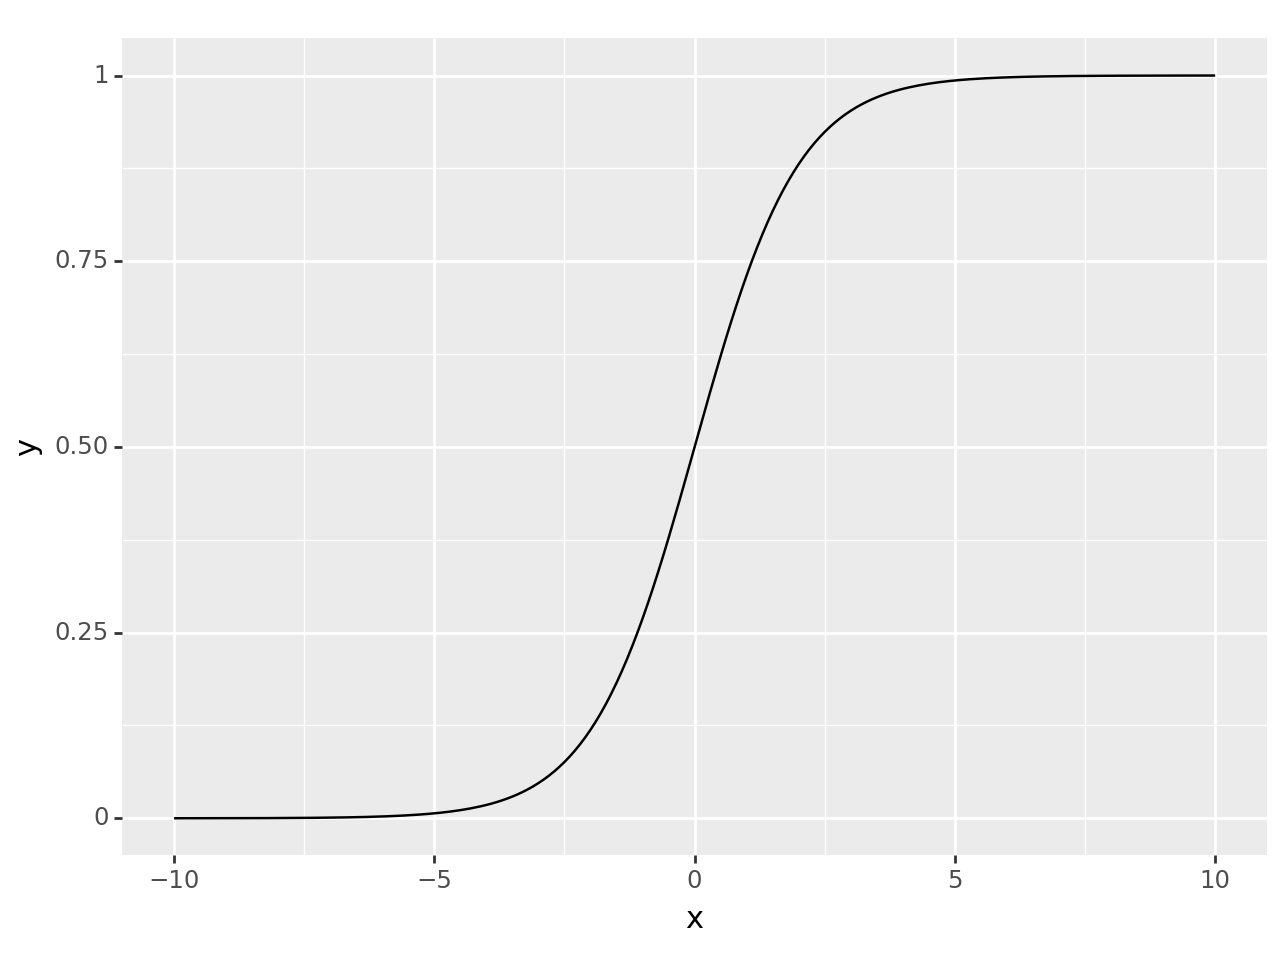

<Figure Size: (640 x 480)>

In [20]:
(ggplot(data=sigmoid_data, mapping=aes(x="x",y="y"))+
geom_line())

### Scaling to a layer of neurons

Now that we've covered all of the foundational computations for a single neuron, let's scale up to a layer of neurons.

In a neural network model, a layer of neurons is just a group of neurons that usually receive the same/similar inputs and connect to the same/similar outputs. Sometimes the neurons in a layer connect to each other, but more often they do not.

We could create a neural network model by creating lots of individual neurons using the computational steps we walked through above, but this would be hard to keep track of and inefficient. Instead, we'll use some matrix computations (that `numpy` makes very easy!) to compute a whole layer at the same time.

#### Inputs & Weights

Inputs to a layer work the same as inputs to a single unit. In both cases, the input is a vector of values.

To get some practice with other useful functions, this time we will generate the inputs randomly, using numpy's random functions.

In [21]:
# generates 10 numbers between -1 and 1. the distribution of values
# is uniform, so all values in that range are equally likely
inputs = np.random.uniform(low=-1, high=1, size=10)
inputs

array([ 0.49454637, -0.53897416, -0.9173491 ,  0.47425132,  0.50434808,
        0.5091234 ,  0.84606227,  0.98730617,  0.12604912,  0.83796564])

For a single neuron, the weights were a vector that matched the length of the input.

For a layer of neurons, we can create a matrix to hold the weights. Each **column** in the matrix contains the weights for one neuron. The **rows** in the matrix correspond to each input, so reading across a row tells you the weights that connect from one input value to each of the neurons in the layer.

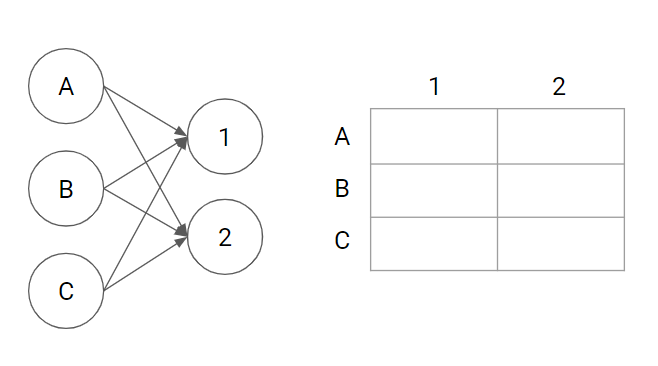

So how do we create a matrix?

One of the most important concepts that you'll need to understand for working with deep learning models is *shape* and *reshaping* a numpy array.

Let's start with shape: if you have a `numpy` array you can use the `.shape` property to get its shape. The shape will be represented as a python *tuple*, which looks like this: `(3,5)`. A shape of `(3,5)` means that the array has two dimensions (because there are two values). The first dimension has 3 values per entry and the second has 5. This is a 3x5 matrix. Once we start working with deep learning models we will regularly have arrays that have more than two dimensions.

Let's say you want to take a set of values and change their shape. For example, suppose we have a numpy array of 12 values and we want to turn it into a 3x4 matrix.

We can start with generating a sequence from 0 to 11 using `np.arange()`.

In [22]:
array_values = np.arange(12)
array_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Then we can use `.reshape()` to change the shape. When using `reshape()` you pass in the desired shape as a tuple. Here our desired shape is `(3,4)`.

In [23]:
matrix_values = array_values.reshape((3,4))
matrix_values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

For the weights of our neural network layer, we need a matrix of shape `(i, n)`, where `i` is the number of inputs and `n` is the number of neurons in the layer.

We have 10 inputs (defined above as `inputs`). Let's say we have 5 neurons in this layer. Create a weight matrix that has random weights between -1 and 1 using the tools described above.

In [24]:
neurons_num = 5
weights_size = len(inputs) * neurons_num
weights_layer = np.random.uniform(low=-1, high=1, size=weights_size).reshape(10, 5)
weights_layer

array([[-0.42718543,  0.64989522, -0.4710215 , -0.74869679, -0.85155971],
       [ 0.01557824,  0.49514636, -0.26593927, -0.59872152, -0.46565484],
       [-0.62529067,  0.55075307, -0.05809104,  0.25982277, -0.03862551],
       [-0.01878921,  0.73522195, -0.88941603,  0.88420264,  0.84302694],
       [ 0.24194413,  0.40865967, -0.87748915,  0.79137674, -0.8536296 ],
       [-0.04353889, -0.16029601,  0.96386936,  0.58689919, -0.8840392 ],
       [-0.87193875,  0.1455061 , -0.13787355,  0.85583807,  0.97847451],
       [-0.01024975,  0.72358472,  0.0664021 , -0.06062187, -0.55315696],
       [-0.26771373,  0.42047375, -0.65005725, -0.885957  , -0.27079461],
       [-0.79524663, -0.53259009,  0.27805571, -0.15841002,  0.44488903]])

#### Bias

Each unit in our layer needs its own bias parameter. Create a numpy array that has one entry for each neuron. You can use random values for the bias terms.

In [25]:
bias = np.random.uniform(low=-1, high=1, size=neurons_num)
bias

array([-0.65165872, -0.67655152,  0.71414266, -0.54541343,  0.45964825])

#### Input signal

To compute the input signal for the layer, we need to take the dot product between the weights and the inputs for each neuron.

We could do this by looping over our weight matrix and calculating the dot product separately for each neuron, but `numpy` gives us a nice shortcut. If we use `np.dot()` with the weight matrix as one of the terms, numpy automatically takes the dot product separately for each column. (This is why it is important to structure the weight matrix as `(i,n)` instead of `(n,i)`).

In [26]:
input_signal_layer = np.dot(inputs, weights_layer)
input_signal_layer

array([-1.0030714 ,  0.46669066, -0.30998448,  1.25117339,  0.00485178])

An important step in debugging neural networks is to check the shape when you compute new things. Our `input_signal_layer` should have shape `(5,)`, since there are five neurons in our model layer.

In [27]:
input_signal_layer.shape

(5,)

We now have the signal for inputs * weights, but haven't factored in the bias yet. When we have two arrays of equal length, we can simply add them and numpy will add each corresponding element together.

In [28]:
total_input = input_signal_layer + bias

#### Activation function

We now have the total input signal, including the bias, for each neuron in our layer. The last step is to run this signal through our activation function.

When we wrote the `sigmoid` function above, one thing we did is use `np.exp` to compute the $e^{-x}$ term, which was the only term that used the $x$ value in the function. Because we used this function, we can pass in a numpy array to our existing function and we will get an array back.

In [29]:
activation = sigmoid(total_input)
activation

array([0.16047068, 0.4477265 , 0.5996863 , 0.66946359, 0.61408116])

We've now completed the computations for a layer!

### Scaling to a multi-layer network

Our final step for now is to connect two layers together.

There are a bunch of ways that we could do this from a programming perspective. We could compute each step by writing a script, we could create a class for a neural network layer or even a whole network, we could abstract certain computations as functions, and so forth. To keep things simple and avoid introducing to many new python concepts, we're going to compute things mostly by writing them out, but we'll write one helper function to avoid being too repetitive with our code.

Two important concepts in neural networks are the *forward pass* and the *backward pass*.

The forward pass refers to giving the network some input and computing all of the activations until you arrive at the output.

The backward pass is when you take the resulting output and use it to train the network by passing the error backwards through the net.

We're only worrying about the forward pass for now. Let's write a function that can compute the forward pass for a single layer, given the `inputs` to the layer, the `weights` of the layer, and the `bias` of the layer. We'll use the `sigmoid` activation function.

The function should compute the input signal from the `inputs`, `weights`, and `bias`, and then output the result of passing this through the sigmoid activation function.

In [30]:
def forward_pass(input, weights, bias):
  # implement me!
  return np.dot(input, weights) + bias

To build our network, let's create two layers.

The first layer will get 10 inputs, and have 5 neurons.

The second layer will get the output of the first layer and have 3 neurons.

Create the `weights` and `bias` terms for each layer. You can use separate variables like `layer_1_weights` and `layer_2_weights`.

In [31]:
neurons_num1 = 5
weights_num1 = 10

layer_1_weights = np.random.uniform(low=-1, high=1, size=(neurons_num1 * weights_num1)).reshape(weights_num1, neurons_num1)
layer_1_bias = np.random.uniform(low=-1, high=1, size=neurons_num1)

In [32]:
neurons_num2 = 3
weights_num2 = 5

layer_2_weights = np.random.uniform(low=-1, high=1, size=(neurons_num2 * weights_num2)).reshape(weights_num2, neurons_num2)
layer_2_bias = np.random.uniform(low=-1, high=1, size=neurons_num2)

Now, to compute the forward pass, we need to run our `forward_pass` function on the first layer and then use the output to run the `forward_pass` function on the second layer.

Do that below.

In [33]:
layer_1_inputs = np.random.uniform(low=-1, high=1, size=weights_num1)

# get the output for layer 1
layer_2_inputs = forward_pass(layer_1_inputs, layer_1_weights, layer_1_bias)

In [34]:
# get the output for layer 2
forward_pass(layer_2_inputs, layer_2_weights, layer_2_bias)

array([-0.02118651,  0.58270323,  0.58831258])

Congrats! You've now got a functioning multi-layer network.

# Part 2: The Interactive Activation Model

This part of the lab focuses on a very influential model from the early days of connectionist research in cognitive science. [McClelland & Rumelhart (1981)](https://cseweb.ucsd.edu//~0gary/258/mcclelland-rumelhart-iam-1981.pdf) described one of the early versions of an Interactive Activation Model.

Interactive activation models consist of pools of nodes (sort of like layers, but there could be more than one group per layer). Within a pool, the nodes typically inhibit one another, so that there is some competition for activation. Connections between pools can be excitatory or inhibitory.

These models have been used to model a wide variety of cognitive processes, mainly in the domains of perception and memory. We're going to focus on the classic example of the perception of letters and words in context.

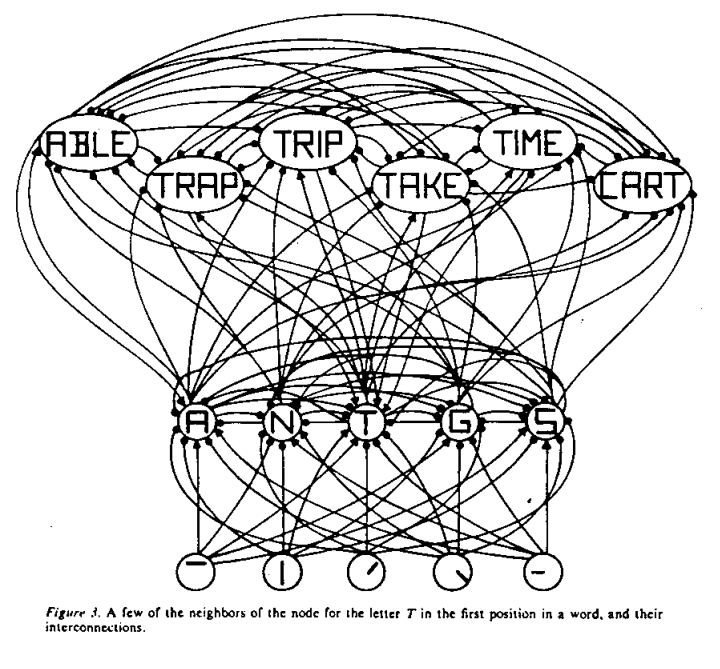

## Implementing an interactive activation layer

The code below implements one layer (or "pool") of an interactive activation model. This is, as best as I can tell, an exact implementation of the model described in the paper. I'm providing this to you because implementing it from scratch would be a little too much to ask at this point in the semester. I've done my best to provide comments that explain what is going on. My hope is that you can get something useful out of seeing this implementation.

In [35]:
import numpy as np

class IacLayer:
  def __init__(self, size, weights=None, decay_rate=0.1, resting_state=0.0, max_value=1.0, min_value = -1.0, inhibition_strength=1.0):
    self.size = size
    self.decay_rate = decay_rate
    self.max_value = max_value
    self.min_value = min_value
    self.inhibition_strength = inhibition_strength
    self.weights = weights

    if isinstance(resting_state, float):
        self.resting_state = np.full(size, resting_state)
    else:
        self.resting_state = resting_state

    self.inhibitory_weights = np.full((size, size), -inhibition_strength)
    np.fill_diagonal(self.inhibitory_weights, 0)

    self.state = self.resting_state

  # this resets the layer to its initial state
  def reset(self):
    self.state = self.resting_state

  def step(self, inputs):
    if(self.weights is None):
      raise ValueError("weights cannot be None")

    if(len(inputs) != len(self.weights)):
      raise ValueError("inputs must have the same number of top-level items as weights")

    input_signal = 0

    for i in range(len(inputs)): #3 -> 3 matrices
      clipped_input = np.clip(inputs[i], 0, None)
      input_signal += np.dot(clipped_input, self.weights[i])

    clipped_state = np.clip(self.state, 0, None)
    inhibitory_signal = np.dot(clipped_state, self.inhibitory_weights)
    total_input = input_signal + inhibitory_signal

    input_activity = (
      ((total_input > 0) * (total_input) * (self.max_value - self.state)) +
      ((total_input <= 0) * (total_input) * (self.state - self.min_value))
    )

    decay = self.decay_rate * (self.state - self.resting_state)
    self.state = self.state - decay + input_activity
    self.state = np.clip(self.state, self.min_value, self.max_value)

    return self.state

## The alphabet

The version of the model explored in the 1981 paper uses an alphabet constructed out of 14 features.

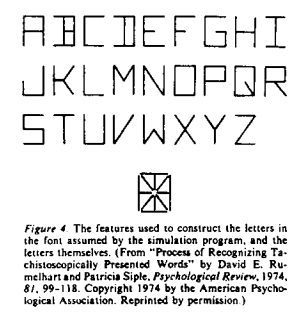

To encode these features as input to our network, we'll treat each letter as 14 values in a specific order. When a feature is present, the array will have a 1, and when the feature is absent we will use a 0.

The order of the segments in the array is shown here:

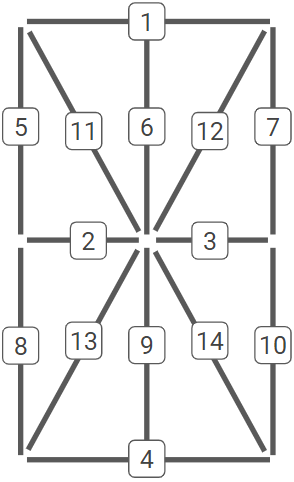


In [36]:
letters = np.array([
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], # A
    [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], # B
    [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], # C
    [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], # D
    [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], # E
    [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], # F
    [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], # G
    [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], # H
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], # I
    [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], # J
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], # K
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], # L
    [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0], # M
    [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1], # N
    [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], # O
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # P
    [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], # Q
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], # R
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], # S
    [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], # T
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], # U
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0], # V
    [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], # W
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], # X
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # Y
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]  # Z
])

# 14 x 26 array, where each row gives the weight of each feature across 26 letters
w_from_features_to_letters = letters.transpose()

# We added this matrix that holds the complement of the original features to
# letters matrix, such that a 1 in w_from_features_to_letters becomes a 0 in
# w_from_features_to_letters, and vice versa.
# This matrix therefore represents for each feature, which letter(s) it is
# absent in.
w_from_features_to_letters_absence = 1 - w_from_features_to_letters
# scalar 1 is broadcast to each elem
# so each elem = 1 - elem; so 1 - 1 = 0, 1 - 0 = 1

## The vocabulary

The original paper states that the model has weights for 1,179 four letter words -- but it doesn't give us the list of words. I found a dataset online that seems to match the reported data, so I've created a public spreadsheet at the link below.

In [37]:
word_list_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRFeSK1vBTykGB_YxxYxbZOvaSZZRgyWMPCXZ938PqhjvW8luo3dVW2wvyLlfqdJoiaskMNP86SL-LJ/pub?gid=0&single=true&output=csv"

We can load this data using `pandas` and the `read_csv` function. All we need to do is pass in the URL. Because one of the words in the dataset is `"null"`, there are some interesting issues that get created that take way too much time to debug (ask me how I know!). Since `null` is a special term for missing values, `read_csv()` treats this as word as an empty value by default. To prevent this behavior we set `na_filter=False`.

In [38]:
word_data = pd.read_csv(word_list_url, na_filter=False)

Here's the resulting data:

In [39]:
word_data

,word,frequency
0,able,-0.2362
1,ably,-0.9262
2,ache,-0.7603
3,acid,-0.5456
4,acre,-0.6048
...,...,...
1174,zero,-0.4593
1175,zest,-0.7137
1176,zinc,-0.5872
1177,zing,-0.6251


You'll see that there are two columns, one for the words and another for frequency. These frequency values are all between 0 and -1, and more common words are closer to 0.

In the model, we use this value to set the resting activation of each word node. More common words have resting activations closer to 0.

Why does this make sense to do?

> They correspond to an a priori bias for a word's frequency relative to other words, a bias inherent the English language. Functionally, this means that the probability of an input corresponding to a more frequent word is higher than that of a less frequent word, so the word node representing this word should be more easily activated, i.e. require inputs of lower magnitude, than other word nodes.

> Therefore, it makes sense to set these frequency values as the nodes' resting activation: since the resting activation represents the activation level of the node at rest (default), it should be a negative number, meaning that like all other word nodes, the node is inactive (`a(t) < 0`) at rest; but also a larger number (closer to 0) the more frequent the word is, so that a smaller input is required to raise the node's activation level over 0, making its activation more frequent overall. There is thus a positive relationship between frequency and resting activation, so it makes sense to use the frequency values to set the resting activation values in the model.





### Encoding the words as weights


Now that we have the list of words, we need to generate the set of weights that links the WORDS layer to the LETTER layer(s) of the model.

In the IA model, there are four separate pools/layers at the LETTER layer of the network. These correspond to each of the four letter positions. There are 26 nodes in each of these pools, one for each letter.

At the WORDS layer, there is one node for each word.

The weights between these layers need to reflect when a letter and word match. For example, the node for ABLE in the WORDS layer should have a positive connection to the node for A in the first position, the node for B in the second position, L in the third, and E in the fourth.

If we think about the shape of these connections, each LETTER layer will have a matrix of shape `(26, 1179)`, to represent the connections from the 26 nodes in the LETTER layer to the 1179 nodes in the WORDS layer.

Below is a short chunk of code that converts a word into these connections. It creates an array of shape `(4, 26, 1179)`, where the first dimension, the 4, refers to the four distinct pools of nodes at the LETTER layer.

*Disclosure: I used an AI coding assistant to help me write this one! It was fast.*

In [40]:
# Extract the 'word' column from word_data as a list.
words = word_data['word'].tolist()

In [41]:
# Create a dictionary that maps each letter to its index in the alphabet
alphabet = 'abcdefghijklmnopqrstuvwxyz'
letter_to_index = {letter: index for index, letter in enumerate(alphabet)}

# Create an empty array to hold the one-hot encoded representations
w_from_words_to_letters = np.zeros((4, 26, len(words)))

# Loop over each word in words
for i, word in enumerate(words):
    # Loop over each letter in the word
    for j, letter in enumerate(word):
        # Get the index of the letter in the alphabet
        index = letter_to_index[letter]
        # Set the corresponding element in the one-hot array to 1
        w_from_words_to_letters[j, index, i] = 1


## Setting up the model

Now we can put together the network.

There are a number of parameters for this network that control things like the strength of different connection types and the decay rate. I've taken these values from the paper.

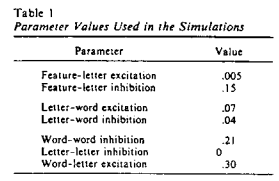

In [42]:
FEATURE_LETTER_EXCITATION = 0.005
FEATURE_LETTER_INHIBITION = 0.15

LETTER_WORD_EXCITATION = 0.07
LETTER_WORD_INHIBITION = 0.04

WORD_LETTER_EXCITATION = 0.3
WORD_LETTER_INHIBITION = 0.0 # None in the initial models in the paper

WORD_WORD_INHIBITION = 0.21
LETTER_LETTER_INHIBITION = 0.0

MIN_ACTIVATION = -0.2
DECAY_RATE = 0.07

# we use this value to scale the resting states. the resting data is in the range
# 0 to -1. we multiply those values by this gain factor to get the resting state.
# making this larger will increase the impact that word frequency has in the model.
REST_GAIN = 0.05

To generate all of the relevant weight matrices, we need to replace the 0s and 1s with the appropriate excitatory and inhibitory weights defined in the parameter list above.

To do this, we use `np.where()`. It generates a new array by looking at the logical statement in the first argument, and inserting the second argument when that value is `True` and the third argument when it is `False`.

In [43]:
# where w_from_features_to_letters == 0.005, w_from_features_to_letters_absence == -0.15
# and vice versa
w_from_features_to_letters = np.where(w_from_features_to_letters == 1, FEATURE_LETTER_EXCITATION, -FEATURE_LETTER_INHIBITION)

# we have to do the same thing for the absence matrix, turning all the 1s to the excitation value and 0s to the negative inhibition value
# this makes w_from_features_to_letters_absence stay as the complement of w_from_features_to_letters
w_from_features_to_letters_absence = np.where(w_from_features_to_letters_absence == 1, FEATURE_LETTER_EXCITATION, -FEATURE_LETTER_INHIBITION)
w_from_letters_to_words = np.where(w_from_words_to_letters==1, LETTER_WORD_EXCITATION, -LETTER_WORD_INHIBITION) #bottom-up; does not modify original
w_from_words_to_letters = np.where(w_from_words_to_letters==1, WORD_LETTER_EXCITATION, -WORD_LETTER_INHIBITION) #top-down; modifies original

The resting state can be extracted as a numpy array from the pandas data frame like this:

In [44]:
resting = word_data['frequency'].to_numpy()

Now we can create the four pools at the LETTERS layer and the one pool at the WORDS layer. Notice that the LETTERS layer gets a list of two sets of weights. This is because the LETTERS layer receives both bottom-up input from the FEATURES layer and top-down input from the WORDS layer.

In [45]:
# now the weights for each IacLayer consists of 3 matrices instead of 2
# because we now feed the feature absence matrix as a set of weights too
letters_layer_0 = IacLayer(26, weights=[w_from_features_to_letters, w_from_features_to_letters_absence, w_from_words_to_letters[0].transpose()], decay_rate=DECAY_RATE, min_value = MIN_ACTIVATION, inhibition_strength=LETTER_LETTER_INHIBITION)
letters_layer_1 = IacLayer(26, weights=[w_from_features_to_letters, w_from_features_to_letters_absence, w_from_words_to_letters[1].transpose()], decay_rate=DECAY_RATE, min_value = MIN_ACTIVATION, inhibition_strength=LETTER_LETTER_INHIBITION)
letters_layer_2 = IacLayer(26, weights=[w_from_features_to_letters, w_from_features_to_letters_absence, w_from_words_to_letters[2].transpose()], decay_rate=DECAY_RATE, min_value = MIN_ACTIVATION, inhibition_strength=LETTER_LETTER_INHIBITION)
letters_layer_3 = IacLayer(26, weights=[w_from_features_to_letters, w_from_features_to_letters_absence, w_from_words_to_letters[3].transpose()], decay_rate=DECAY_RATE, min_value = MIN_ACTIVATION, inhibition_strength=LETTER_LETTER_INHIBITION)

words_layer = IacLayer(len(words), weights=w_from_letters_to_words, decay_rate=DECAY_RATE, min_value=MIN_ACTIVATION, inhibition_strength=WORD_WORD_INHIBITION, resting_state=resting*REST_GAIN)

## Running the model

To run the model, we need to:
1. Define the input
2. Get the `state` of each layer (so that we can use it as input for the layers it is connected to).
3. Call the step function on each layer, passing in the appropriate input(s).
4. Repeat steps 2-3 as many cycles as we want.

While we are doing this, it would be good to save some data so we can see how the model performed. We can create a new data frame using `pandas` to serve as our data store.

Our first task will be to replicate the demo result in the original paper. Here we imagine that a person sees something like the following image:

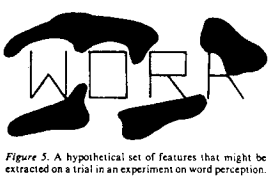

The result reported in the original paper is that WORK becomes highly active, and, importantly, WORD starts to be activated but then reverses and becomes inactive. WEAK and WEAR become inhibited, with activation values below their resting state.

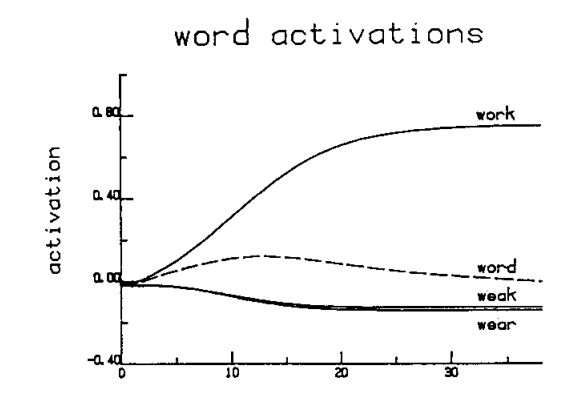

To model this situation, we'll create an input where the first three letters are clearly W-O-R and the last letter is ambiguously an R or K. To represent the ambiguity, we'll see the corresponding features that are covered by the blob to 0 instead of 1 or -1.

We'll show this to the model for 40 cycles (matching the graph above), and we'll record the activation levels for WORK, WORD, WEAK, and WEAR in the WORDS layer of the model at each step.

In [46]:
# define the input
input = [
    letters[letter_to_index["w"]],
    letters[letter_to_index["o"]],
    letters[letter_to_index["r"]],
    [0,1,0,0,1,0,0,1,0,0,0,0,0,1] # ambiguous R or K
]

# define absence version (complement) of input word
input_absence = [
    1 - letters[letter_to_index["w"]],
    1 - letters[letter_to_index["o"]],
    1 - letters[letter_to_index["r"]],
    [0,0,1,1,0,0,0,0,1,1,0,0,1,0] # features we are sure are absent in ambiguous figure
]

# create a data frame with three columns to store the activation values
df = pd.DataFrame(columns=['word', 'timestep', 'activation'])

# reset all the layers of the model (in case the model has already been run).
# this lets you run the model again without recreating the layers.
letters_layer_0.reset()
letters_layer_1.reset()
letters_layer_2.reset()
letters_layer_3.reset()
words_layer.reset()

# loop for 40 cycles
for i in range(40):
  # save the state of each layer (this is important because calling .step() changes the state,
  # so we need a copy of the values before calling .step() to simulate everything happening
  # in one parallel step)
  l_0_s = letters_layer_0.state
  l_1_s = letters_layer_1.state
  l_2_s = letters_layer_2.state
  l_3_s = letters_layer_3.state
  w_s = words_layer.state

  # call step on each of the pools in the letters layer. note that we give each
  # pool the corresponding piece of both input matrix and input_absence matrix
  letters_layer_0.step([input[0], input_absence[0], w_s])
  letters_layer_1.step([input[1], input_absence[1], w_s])
  letters_layer_2.step([input[2], input_absence[2], w_s])
  letters_layer_3.step([input[3], input_absence[3], w_s])

  # call step on the words layer, using the saved state values.
  words_layer.step([
      l_0_s,
      l_1_s,
      l_2_s,
      l_3_s,
  ])

  # this chunk of code is just for saving the data.
  # we use a for loop to run the chunk once for each word.
  # then we get the state of the words layer and extract
  # the activation value for the node that corresponds
  # to the word. the .index() function gets the location
  # of a value in a list.
  # then we build a new row for the data set with the corresponding
  # word, timestep (i is defined way above in the main loop), and
  # the activation value.
  # finally we add all this to the data frame using df.loc[].
  for w in ["work", "word", "weak", "wear"]:
    s = words_layer.state
    activation = s[words.index(w)]
    row = {'word': w, 'timestep': i, 'activation': activation}
    df.loc[len(df)] = row

# once the simulation is done, we can print the dataframe out.
df

,word,timestep,activation
0,work,0,-0.007260
1,word,0,-0.010875
2,weak,0,-0.021170
3,wear,0,-0.020470
4,work,1,0.010720
...,...,...,...
155,wear,38,-0.153379
156,work,39,0.761456
157,word,39,-0.036368
158,weak,39,-0.131206


We can use ggplot again to generate a figure that is pretty close to the original paper.

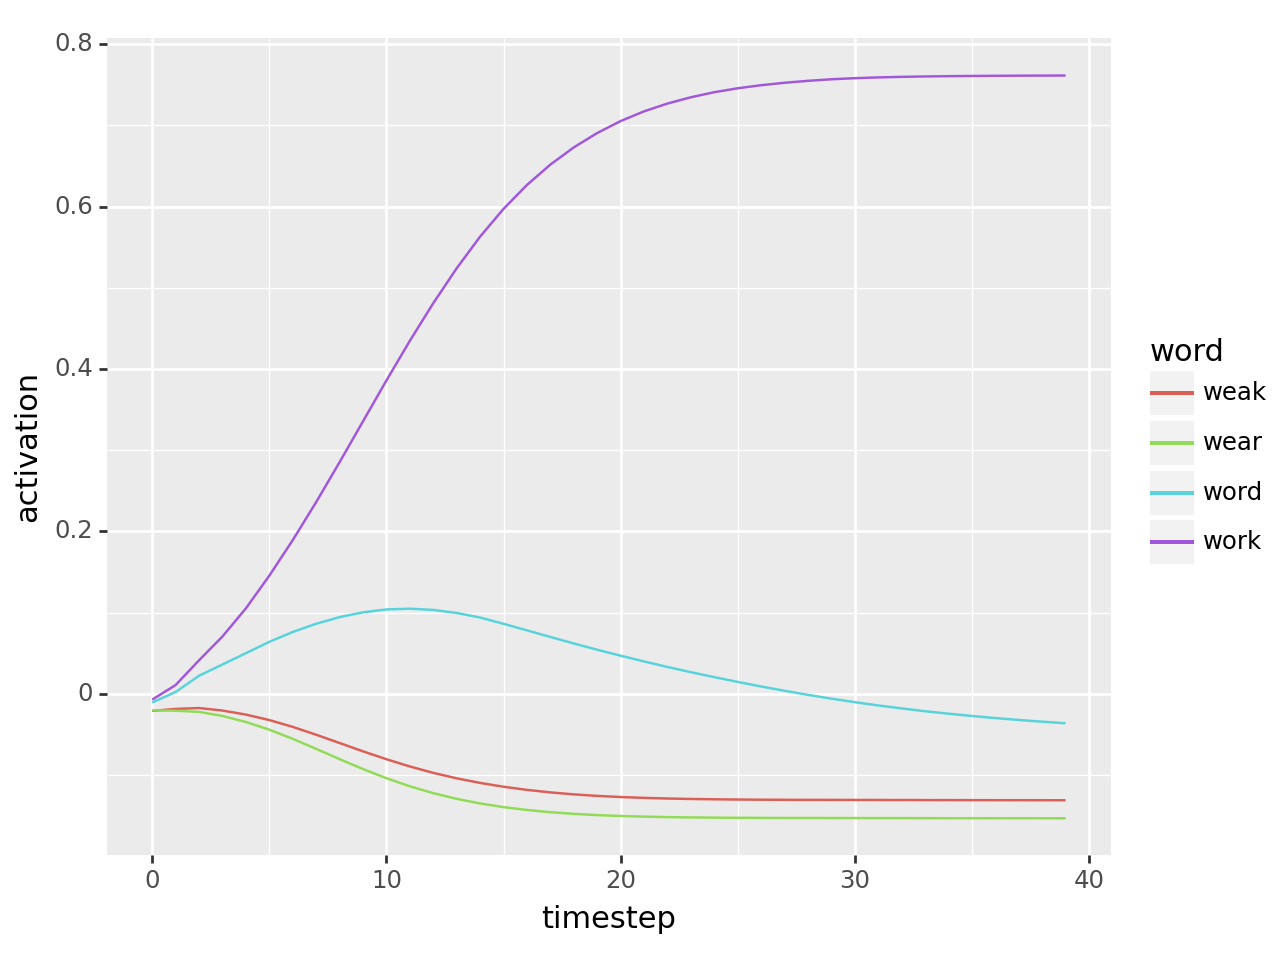

<Figure Size: (640 x 480)>

In [47]:
(ggplot(df, mapping=aes(x="timestep", y="activation", color="word"))+
 geom_line())

## Your task

Your job is to pick an experiment from the original paper (on Moodle) and reproduce the general pattern of results here. You do not need to produce the exact same set of data reported. Instead, summarize the expected result and then generate a simulation that shows the approximate pattern. Then explain why the model shows the behavior that it does.

Note that we didn't implement the decision-making component of this model, but you can use activation values as an approximation, since higher activations will always be more likely to be selected. If you'd like a challenge, you can implement the decision making component yourself.

**Important caveat.** You may find that you can reproduce the general pattern of a result, but that replicating the exact values shown on a graph is quite challenging. This could be due to errors in my recreation of the model, ambiguities in how the model was described, or replicability problems with the model because of poor methodological reporting. You do not need to get exact results to be successful here.

> e.g. "MAVE" \

>Top-down effects on 'M' node:
*   Friends: start with 'M' and share 3 letters
    * excites 'm' node
*   Enemies: do not start with 'M' and share 3 letters, e.g. 'HAVE'
    * inhibit friends
    * excites e.g. 'h' node -> compete with 'm' node(not strong)

>-> Resultant top-down activation of unpresented letters strong enough to overcome bottom-up inhibition of unpresented letters

>Rich-Get-Richer effect:
*   Enemy frequency differences magnify at peak activation
    * e.g. HAVE >>> GAVE >>> SAVE

>Gang effect:
*   Friends (or enemies) in the same gang 'gang up' and push down activation of loner friends
    * e.g. ma_e family (6 members) -> MALE, SAVE
    * vs. m_ve family (1 member) -> MOVE




# The 'rich-get-richer' effect

The 'rich-get-richer' effect describes the activation patterns of different words that naturally occur at different frequencies in English, given the same input. The example in the paper compares the activations of 'have', 'gave' and 'save', which are all structurally similar to the target word 'mave' in the same way, i.e. they are all four letter words with the 'ave' suffix, and differ from 'mave' by not starting with 'm'. This means that any difference in their activation curves is probably not attributed to different activation patterns based on their connections with the nodes corresponding to the input, 'mave'. Therefore, any differences can be assumed to stem from other factors instead, such as the differences between their natural-occurence frequencies.

In the paper, when the input is 'mave', the activation curves of these three words are similar in shape, but with 'have' being consistently the most strongly activated across time, followed by 'gave' and lastly 'save'. This difference is most exaggerated at peak activation for all three. The researchers hypothesize that this is a magnification of the pre-existing differences in the three words' frequencies, which directly correspond to their respective resting activation levels. When one word has a higher frequency, its resting activation level is higher, which means given the same activation input, this word node creeps above threshold and becomes active sooner. Moreover, because these three words inhibit one another, when one word becomes more active, its stronger activation inhibits the other two, further weakening their activation. These two phenomena compound to result in the 'rich-get-richer' effect, where given the same input, higher-frequency words like 'have' show a more exaggerated activation curve compared to similarly-structured words like 'gave' and 'save'. These patterns were recreated using our model below.

In [64]:
# define the input
mave_input = [
    letters[letter_to_index["m"]],
    letters[letter_to_index["a"]],
    letters[letter_to_index["v"]],
    letters[letter_to_index["e"]],
]

# define absence version of input
mave_input_absence = [
    1-letters[letter_to_index["m"]],
    1-letters[letter_to_index["a"]],
    1-letters[letter_to_index["v"]],
    1-letters[letter_to_index["e"]],
]

# mask pattern doesn't really matter as long as it's not very biased towards
# a certain letter's feature pattern
# i.e. all 1s and all 0s give similar results
mask = np.array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]) # this is an O and X combined together
mask_input = [
    mask,
    mask,
    mask,
    mask
]

mask_input_absence = [
    1-mask,
    1-mask,
    1-mask,
    1-mask
]

# create a data frame with three columns to store the activation values
df = pd.DataFrame(columns=['word', 'timestep', 'activation'])

# reset all the layers of the model (in case the model has already been run).
# this lets you run the model again without recreating the layers.
letters_layer_0.reset()
letters_layer_1.reset()
letters_layer_2.reset()
letters_layer_3.reset()
words_layer.reset()

# loop for 40 cycles
for i in range(40):
  # we didn't have this mask thing before (1st draft), which is weird since
  # it's in the paper. without this, the curve increases and never decays back down,
  # which makes sense because the mask acts as a dummy input that does not
  # activate any of the 3 words (net activation is negative),
  # causing all 3 curves to decay at a similar pace after 20 timesteps.

  # what i don't understand is why we still replicated these patterns in the
  # first draft without both the input_absence and the mask.
  # my guess is that something about how input_absence is the complement of input
  # makes the net trajectory always positive..? doesn't make a whole lotta sense though
  if(i < 20):
    input = mave_input
    input_absence = mave_input_absence
  else:
    input = mask_input
    input_absence = mask_input_absence
  # save the state of each layer (this is important because calling .step() changes the state,
  # so we need a copy of the values before calling .step() to simulate everything happening
  # in one parallel step)
  l_0_s = letters_layer_0.state
  l_1_s = letters_layer_1.state
  l_2_s = letters_layer_2.state
  l_3_s = letters_layer_3.state
  w_s = words_layer.state

  # call step on each of the pools in the letters layer. note that we give each
  # pool the corresponding piece of input.
  letters_layer_0.step([input[0], input_absence[0], w_s])
  letters_layer_1.step([input[1], input_absence[1], w_s])
  letters_layer_2.step([input[2], input_absence[2], w_s])
  letters_layer_3.step([input[3], input_absence[3], w_s])

  # call step on the words layer, using the saved state values.
  words_layer.step([
      l_0_s,
      l_1_s,
      l_2_s,
      l_3_s,
  ])

  # this chunk of code is just for saving the data.
  # we use a for loop to run the chunk once for each word.
  # then we get the state of the words layer and extract
  # the activation value for the node that corresponds
  # to the word. the .index() function gets the location
  # of a value in a list.
  # then we build a new row for the data set with the corresponding
  # word, timestep (i is defined way above in the main loop), and
  # the activation value.
  # finally we add all this to the data frame using df.loc[].
  for w in ['gave', 'have', 'save']:
    s = words_layer.state
    activation = s[words.index(w)]
    row = {'word': w, 'timestep': i, 'activation': activation}
    df.loc[len(df)] = row

# once the simulation is done, we can print the dataframe out.
df

,word,timestep,activation
0,gave,0,-0.010725
1,have,0,-0.002450
2,save,0,-0.017485
3,gave,1,0.001303
4,have,1,0.009479
...,...,...,...
115,have,38,0.021422
116,save,38,-0.034906
117,gave,39,-0.019440
118,have,39,0.019751


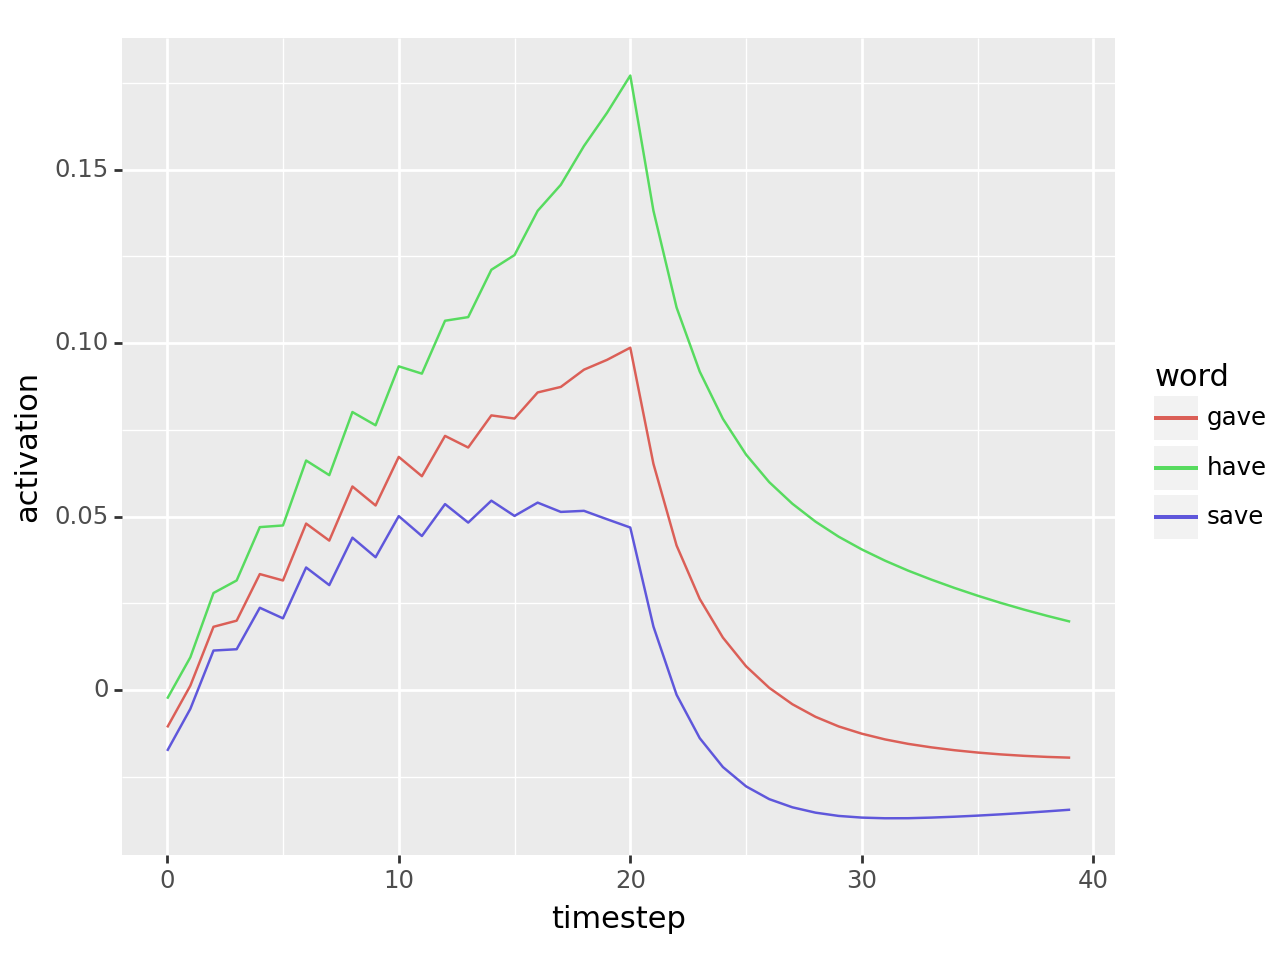

<Figure Size: (640 x 480)>

In [65]:
(ggplot(df, mapping=aes(x="timestep", y="activation", color="word"))+
 geom_line())

First, the entire dataset `words` we use is encoded into a `4x26xlen(words)` array of 0s and 1s, where each letter in each 4-letter word flips their corresponding position in the array. For example, the letter 'h' in the word 'have' corresponds to the position `[0,7,436]` because it is the first letter in the word `[`**0**`,7,436]`, 'h' is the eigth letter in the alphabet `[0,`**7**`,436]`and 'have' is the 436th word in the `words` dataset `[0,7,`**436**`]`.

Next, we generate three weight matrices that represent the excitatory and inhibitory weights between features, letters and words by assigning the globally defined values for these connections (taken from the paper) to the relevant positions in the `w_from_features_to_letters`, `w_from_letters_to_words` and ` w_from_words_to_letters` matrices respectively. For example, the 'h' letter is represented by the features array `[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]`, so each of these 0s represent a feature that inhibits the activation of the 'h' node, thus given a -0.15 value in the `w_from_features_to_letters` array; while the 1s are given a positive 0.005 to represent their excitatory connection to 'h'. Similarly, the 'h' node in the first-letter pool excitatorily connects to the 'have' word node, so it gets a positive 0.07 value as representation in the `w_from_letters_to_words` array. This captures the bottom-up activation effects from letters to words. In turn,  the complementary  `w_from_words_to_letters` array captures the top-down activation effects words like 'have' have on their constituent letters, like a first-letter 'h'.

Next, we set the resting activation of each word node to their frequency values as taken from our dataset `words`. This allows the model to represent the pre-existing relationship between frequency and activation -- the more frequent a word is, the less input it should take to activate it, since it is more likely to occur naturally in language. In the dataset our model uses, the frequencies of 'have', 'gave' and 'save' are -0.0490, -0.2145 and -0.3497 respectively, i.e. frequency-wise 'have' > 'gave' > 'save', matching the pre-existing frequencies described in the paper. Combining the previous three weight matrices and the matrix representing the words' resting activation levels, we can then make the four letter pools representing each position in a 4-letter word and the word layer, intializing them as `IacLayer` objects.

Lastly, we run the model by first encoding the input word 'mave' as an array containing the one-hot encoding of 'm', 'a', 'v' and 'e' respectively. We then reset the letter pools- and word- layers to their resting states. We then run the model 40 times on the input, each time first saving the state of each pool/layer and then calling `step()` on them. Each letter pool gets the corresponding letter as input, i.e. the first-letter pool gets 'm', the second-letter pool gets 'a', etc. The word layer is given the saved states of all four letter pools as input, since these four states combined represent the four-letter word the letter layer "predicts" the input to be. For each word in the dataset, we save its node's activation value at each timestep. At last, we can filter for the words we want to observe, i.e. 'have', 'gave' and 'save' in this case, and plot them on a graph where the x-axis is the timestep and the y-axis is the activation level, which tells us how that word's activation level changed throughout the 40 iterations.

In this example, we successfully replicated the 'rich-get-richer' effect, which is attributed to the difference in frequency values of 'have', 'gave' and 'save'. Tracing back to the `step()` function, we see that the frequency values first affect the model by customizing the resting states of each word node. The compounding effect of more frequent words getting activated earlier and inhibiting its competitors is captured by the `inhibitory_weights` matrix, which has a negative value `(WORD_WORD_INHIBITION)` everywhere except in the diagonal representing the connection between a word node and itself. This is then fed into the total `inhibitory_signal` of the layer: `inhibitory_signal = np.dot(clipped_state, self.inhibitory_weights)`, which is then fed into the final total_input. When one word gets activated, its activation is multiplied by `WORD_WORD_INHIBITION` and fed into the `inhibitory_signal` of all other words in the word layer. Therefore, the model captures the second facet of the 'rich-get-richer' effect, where the earlier increased activation of 'have' inhibits the activation of 'gave' and 'save', magnifying their pre-existing frequency differences.